In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# Load Dataset
df = pd.read_csv('/content/Carbon Emission.csv')
print(df.head())
print(df.columns)

      Sex         Diet     Transport  Vehicle Monthly Distance Km  \
0  female  pescatarian        public                          210   
1  female   vegetarian  walk/bicycle                            9   
2    male     omnivore       private                         2472   
3    male     omnivore  walk/bicycle                           74   
4  female   vegetarian       private                         8457   

   CarbonEmission  
0            2238  
1            1892  
2            2595  
3            1074  
4            4743  
Index(['Sex', 'Diet', 'Transport', 'Vehicle Monthly Distance Km',
       'CarbonEmission'],
      dtype='object')


In [4]:
df1= df.drop('Transport', axis=1)

In [5]:
# Preprocess Data

# Rename columns

df1 = df1.rename(columns={
    'Diet': 'diet',
    'Sex': 'sex',
    'Vehicle Monthly Distance Km': 'transport_km',
})

In [6]:
print(df1.columns)

Index(['sex', 'diet', 'transport_km', 'CarbonEmission'], dtype='object')


In [8]:
#Label Encoding

cols_to_encode = ['diet', 'sex']
le = LabelEncoder()

for col in cols_to_encode:

    df1[col] = le.fit_transform(df1[col])

print(df1)

      sex  diet  transport_km  CarbonEmission
0       0     1           210            2238
1       0     3             9            1892
2       1     0          2472            2595
3       1     0            74            1074
4       0     3          8457            4743
...   ...   ...           ...             ...
9995    1     0           268            2408
9996    0     2          5316            3084
9997    0     3            96            2377
9998    1     2          8688            4574
9999    1     1          9952             826

[10000 rows x 4 columns]


In [9]:
print(df1.dtypes)

sex               int64
diet              int64
transport_km      int64
CarbonEmission    int64
dtype: object


In [10]:
X = df1.drop('CarbonEmission', axis=1)
y = df1['CarbonEmission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Apply Linear regression**

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse:.2f}")

Linear Regression MSE: 619046.50


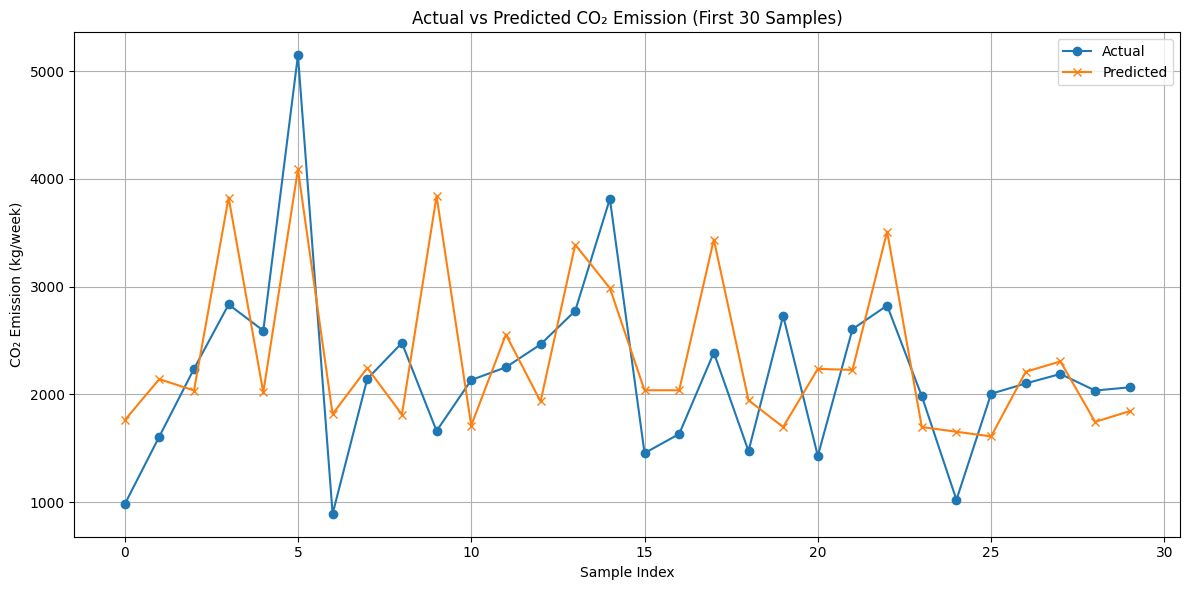

In [13]:
# Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:30], label='Actual', marker='o')
plt.plot(y_pred[:30], label='Predicted', marker='x')
plt.title("Actual vs Predicted CO₂ Emission (First 30 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("CO₂ Emission (kg/week)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Apply Random forest**

In [14]:
model =RandomForestRegressor ()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [15]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Random forest MSE: {mse:.2f}")

Random forest MSE: 851671.76


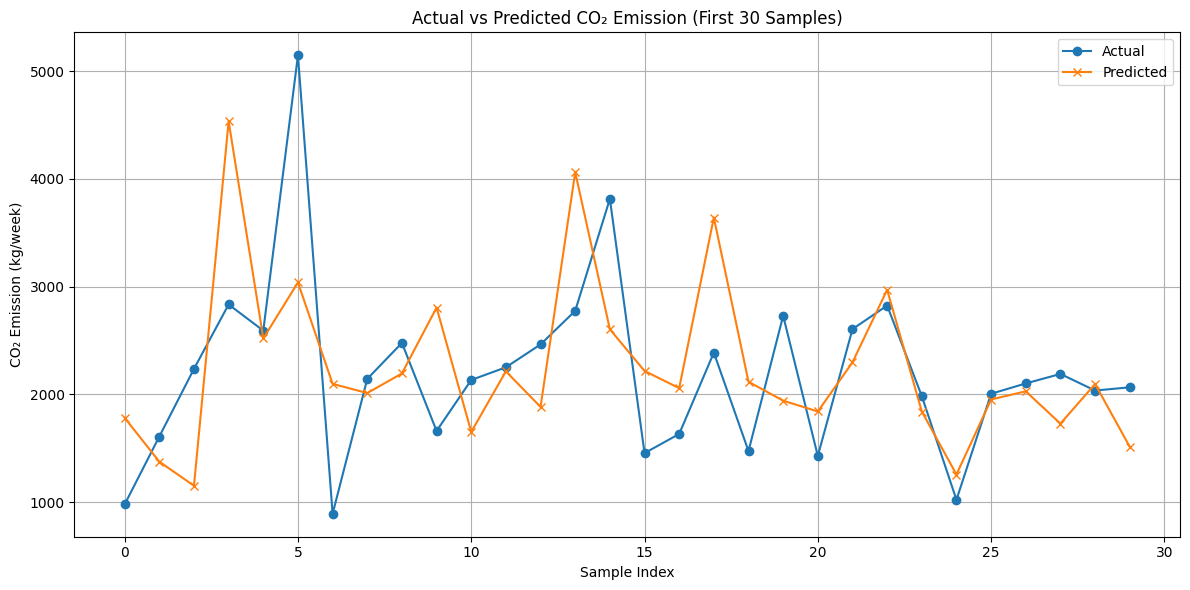

In [16]:
# Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:30], label='Actual', marker='o')
plt.plot(y_pred[:30], label='Predicted', marker='x')
plt.title("Actual vs Predicted CO₂ Emission (First 30 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("CO₂ Emission (kg/week)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()